In [2]:
# create masks and images for training 

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def hsv_yellow_mask(img, lower=(15,90,200), upper=(30,170,255), display=False,write=False):
    """
    Takes image and returns masked image removing all non yellowish pixels
    
    Params
    img: cv2 BGR image
    lower: 3 tuple of hsv lower bounds
    upper: 3 tuple of hsv upper bounds
    display: bool flag to display image in imshow def = False
    
    Return    
    img: cv2 BGR image
    """
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) 

    #lower = (15,90,200)
    #upper = (30,170,255)
    # blue, green, red (mabye)
    lower = (15,90,100)
    upper = (30,170,255)

    mask = cv2.inRange(hsv, lower, upper)

    ## slice the mask
    imask = mask>0
    gauss = np.zeros_like(img, np.uint8)
    gauss[imask] = img[imask]
    
    ## save 
    if write:
        cv2.imwrite("result.png", green)
    if display:
        plt.figure(figsize=(15, 15))
        plt.imshow(gauss)
    return gauss


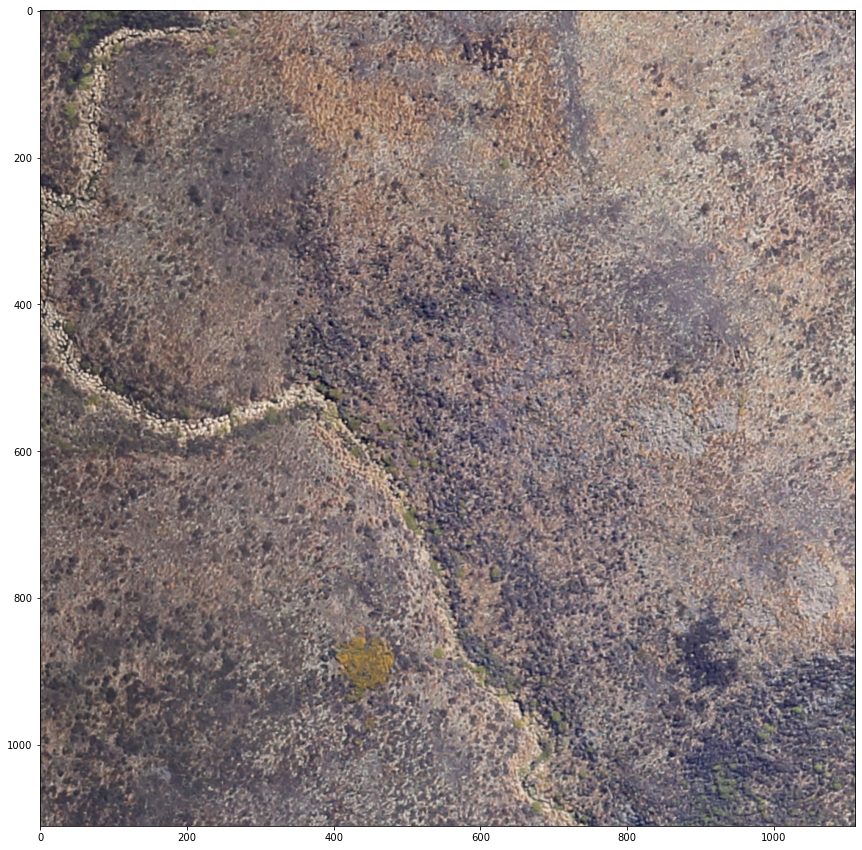

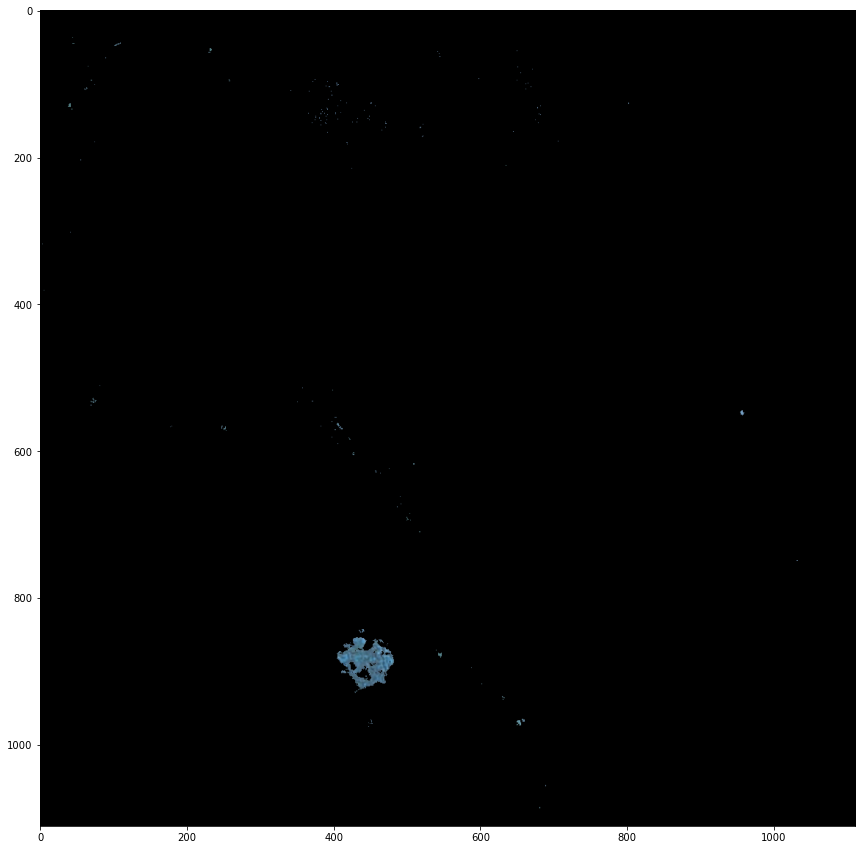

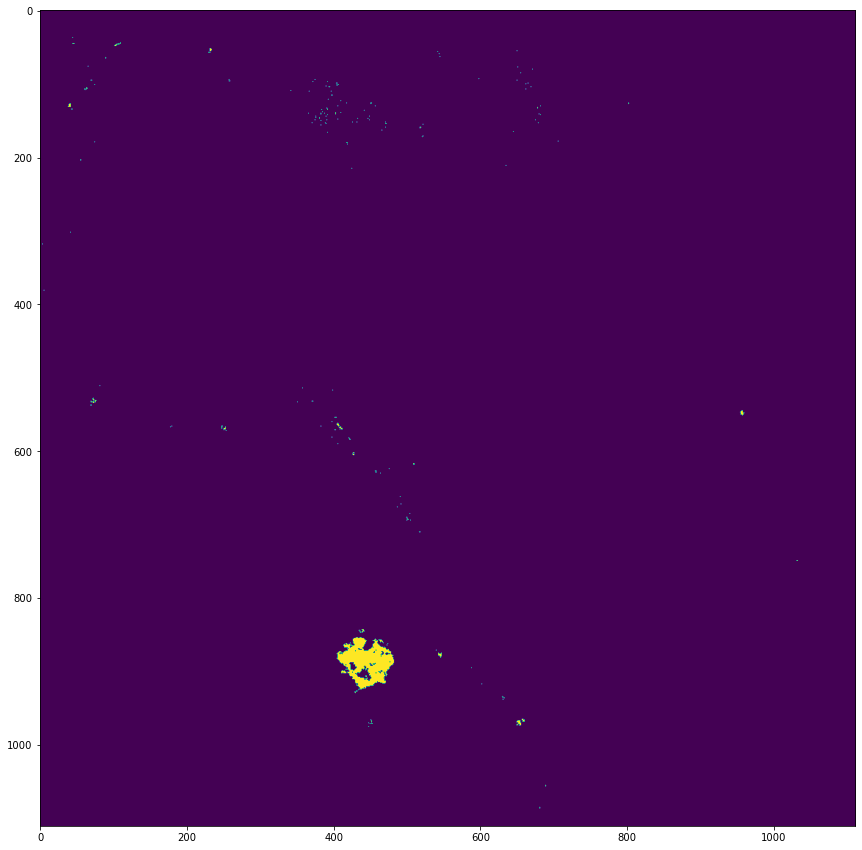

In [5]:
gorse = cv2.imread('data/DR20_gorse_156.tif')

gorse_slice = gorse[6666:7777,1111:2222,  :]
slice = cv2.cvtColor(gorse_slice, cv2.COLOR_BGR2RGB) 

plt.figure(figsize=(15, 15))
plt.imshow(slice)
green = hsv_yellow_mask(gorse_slice, display=True)
ary2 = cv2.cvtColor(green, cv2.COLOR_RGB2GRAY)

ary = ary2.copy()
ary= (ary > 0).astype(int)

plt.figure(figsize=(15, 15))
plt.imshow(ary)


In [8]:
def morph(img):
    kernel = np.ones((5, 5), np.uint8)
    img_erosion = cv2.erode(img, kernel, iterations=1)
    img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
    return img_dilation
 


In [30]:

import os
def create_filesystem():
    # only works on linux
    if not os.exists('train'):
        os.mkdir('train')
    if not os.exists('train/images/'):
        os.mkdir('train/images/')   
    if not os.exists('train/labels/'):
        os.mkdir('train/labels/')
    if not os.exists('test'):
        os.mkdir('test')
    if not os.exists('test/images/'):
        os.mkdir('test/images/')
    if not os.exists('test/labels/'):
        os.mkdir('test/labels/')
    if not os.exists('valid'):
        os.mkdir('valid')
    if not os.exists('valid/images/'):
        os.mkdir('valid/images/')
    if not os.exists('valid/labels/'):
        os.mkdir('valid/labels/')

In [29]:
from genericpath import exists
from random import randint
def generate_dataset(tile_name, shape):
    """
    tile_name str to be opened with cv2
    shape tuple, expected output (e.g (277, 277, 3) )
    will likely shave pixels off the edge
    """
    img = cv2.imread('data/' + tile_name)
    lx, ly, channels = shape
    img_x, img_y, _ = img.shape
    for y in range(img_y//shape[1]):
        for x in range(img_x//shape[0]):
            # print(f'executing {x} {y}')
            # print(f'{y*ly}:{(y+1)*ly}, {x*lx}:{(x+1)*lx},')
            slice = img[y*ly:(y+1)*ly, x*lx:(x+1)*lx,:]
            image = cv2.cvtColor(slice, cv2.COLOR_BGR2RGB) 
            # plt.imshow(slice)

            slice = hsv_yellow_mask(image)
            slice = morph(slice)
            slice = cv2.cvtColor(slice, cv2.COLOR_RGB2GRAY)
            # slice = ary2.copy() ?
            slice = (slice > 0).astype(int)
            # print(slice.sum())
            if slice.sum() == 0:
                # print(x, y, 'empty')
                continue
            saved = save_image(slice, image, tile_name, x, y)
            # saved = cv2.imwrite(f"train/labels/{tile_name[:-4]}_{x}_{y}.png", slice)
            # # print(f"train/{tile_name[:-4]}_{x}_{y}_mask.png")
            # # print(x)
            # if not saved:
            #     raise Exception("Could not save")
            # saved = cv2.imwrite(f"train/images/{tile_name[:-4]}_{x}_{y}.png", image)
            if not saved:
                raise Exception("Could not save")

def save_image(slice, image, tile_name, x, y):
    """ random split while creating the dataset
    """
    rand = randint(0, 10)
    if rand < 2:
        saved = cv2.imwrite(f"test/labels/{tile_name[:-4]}_{x}_{y}.png", slice)
        saved2 = cv2.imwrite(f"test/images/{tile_name[:-4]}_{x}_{y}.png", image)
    elif rand < 5:
        saved = cv2.imwrite(f"valid/labels/{tile_name[:-4]}_{x}_{y}.png", slice)
        saved2 = cv2.imwrite(f"valid/images/{tile_name[:-4]}_{x}_{y}.png", image)
    else:
        saved = cv2.imwrite(f"train/labels/{tile_name[:-4]}_{x}_{y}.png", slice)
        saved2 = cv2.imwrite(f"train/images/{tile_name[:-4]}_{x}_{y}.png", image)
    return saved and saved2


gorse = 'DR20_gorse_156.tif'
generate_dataset(gorse, (277, 277, 3))
    

In [10]:
1111/4

277.75